# Lab-1

Name: Purusharth Malik

Registration No.: 2348542

### 1.Create a Python implementation of the perceptron learning algorithm to train neural networks for the following boolean functions: a) AND, b) OR, c) NAND, d) XOR. Begin by manually assigning weights and displaying the number of errors between positive and negative outcomes. Then, utilize the perceptron learning algorithm to adjust the weights and eliminate these errors by finding the optimal weight configuration.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#creating a perceptron
class Perceptron:
        
    #constructor
    def __init__(self, alpha=0.01, n_iter=500):
        self.alpha = alpha
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.error_per_iter = list()
        
    #activation function
    def activation(self, value):
        #we are using the heaviside step function
        return np.where(value>0, 1, 0)
    
    #updating the weights
    def update_weights(self, x, y, y_pred):
        #calculating the error
        error = y-y_pred
        self.error_per_iter.append(error)
        #updating the weights
        self.weights = self.weights + (self.alpha*error)*x
        self.bias = self.bias + (self.alpha*error)
        
    #fitting the data
    def fit(self, X, y):
        n_rows, n_cols = X.shape
        
        #initializing the weights and biases as given in the question
        self.weights = [0.5, 0.243]
        self.bias=0.2
        
        #running a for loop for a given number of iterations
        for _ in range(self.n_iter):
            #going through the data one row at a time
            for idx, x in enumerate(X):
                #calculating the output
                output = np.dot(x, self.weights) + self.bias
                #activating the output
                activated_output = self.activation(output)
                #updating the weights
                self.update_weights(x, y[idx], activated_output)
                
    #predicted new values
    def predict(self, x):
        output = self.activation(np.dot(x, self.weights) + self.bias)
        return output

### AND Gate

In [5]:
#creating data for AND gate
AND = pd.DataFrame([[0,0,0],
                  [0,1,0],
                  [1,0,0],
                  [1,1,1]], columns=['x1', 'x2', 'y'])

AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


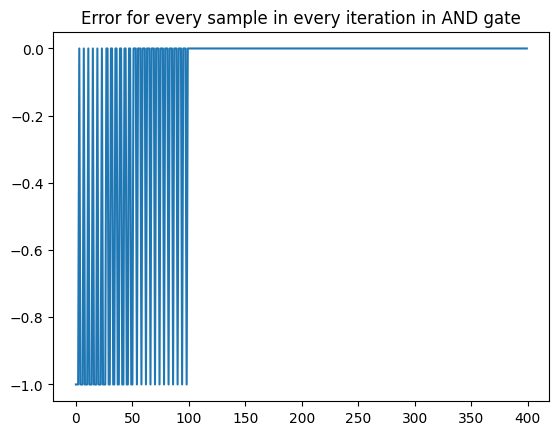

In [6]:
#applying the perceptron
perceptron = Perceptron(alpha=0.01, n_iter=100)
perceptron.fit(AND.drop('y', axis=1).values, AND['y'])

plt.plot(perceptron.error_per_iter)
plt.title("Error for every sample in every iteration in AND gate")
plt.show()

### OR Gate

In [7]:
#creating data for OR gate
OR = pd.DataFrame([[0,0,0],
                  [0,1,1],
                  [1,0,1],
                  [1,1,1]], columns=['x1', 'x2', 'y'])

OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


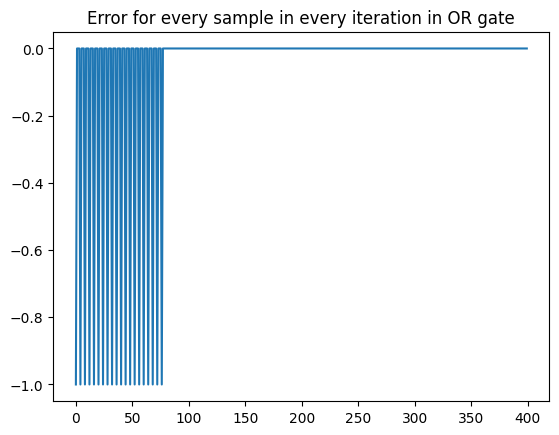

In [8]:
#applying the perceptron
perceptron = Perceptron(alpha=0.01, n_iter=100)
perceptron.fit(OR.drop('y', axis=1).values, OR['y'])

plt.plot(perceptron.error_per_iter)
plt.title("Error for every sample in every iteration in OR gate")
plt.show()

### NAND Gate

In [15]:
#creating data for NAND gate
NAND = pd.DataFrame([[0,0,1],
                     [0,1,1],
                     [1,0,1],
                     [1,1,0]], columns=['x1', 'x2', 'y'])

NAND

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


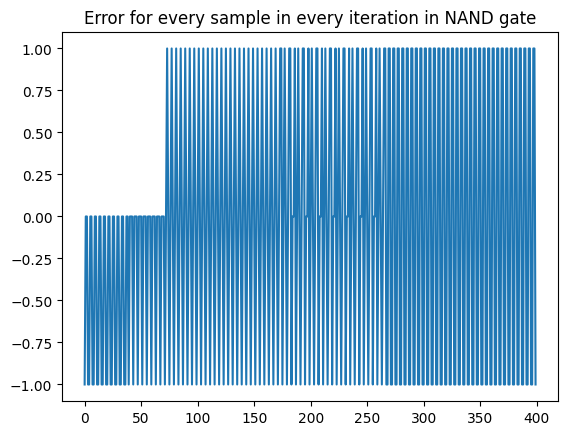

In [16]:
perceptron = Perceptron(alpha=0.01, n_iter=100)
perceptron.fit(NAND.drop('y', axis=1).values, XOR['y'])

plt.plot(perceptron.error_per_iter)
plt.title("Error for every sample in every iteration in NAND gate")
plt.show()

### XOR Gate

In [9]:
#creating data for XOR gate
XOR = pd.DataFrame([[0,0,0],
                  [0,1,1],
                  [1,0,1],
                  [1,1,0]], columns=['x1', 'x2', 'y'])

XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


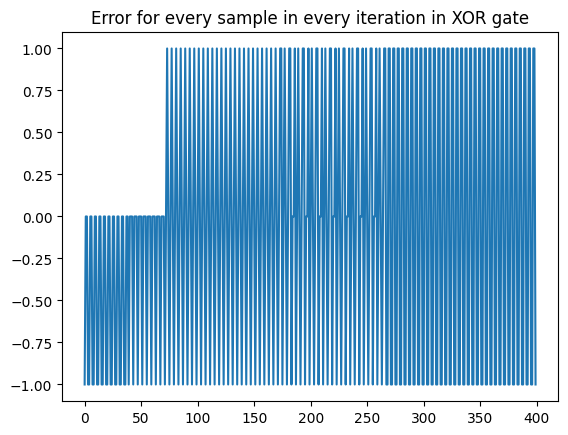

In [17]:
perceptron = Perceptron(alpha=0.01, n_iter=100)
perceptron.fit(XOR.drop('y', axis=1).values, XOR['y'])

plt.plot(perceptron.error_per_iter)
plt.title("Error for every sample in every iteration in XOR gate")
plt.show()

### 2. Develop a Python script to utilize the gradient descent algorithm for locating the global minima of the following equations. Additionally, ensure the program prints the number of iterations taken to identify the global minima.

$$ f(x) = x^{2} - 2x + 2$$

Number of iterations taken to converge: 42


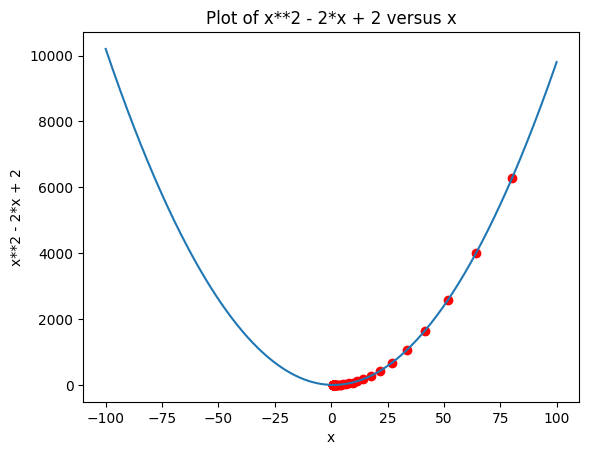

Minimum value of x: 1.0067375908650344
Minimum cost: 1.00004539513066


In [65]:
import numpy as np
import sympy as sp
import random
import matplotlib.pyplot as plt

# Create the symbol
x = sp.symbols("x")

# Create the function
f_x = x**2 - 2*x + 2

# Prepare the function for numerical evaluations
grad_f = sp.lambdify(x, sp.diff(f_x, x))  # Use diff instead of derive_by_array

# Gradient Descent parameters
alpha = 0.1  # Step size
iterations = 100  # Number of iterations

# Initial guess for x (starting point)
starting_point = 100.0
x_descent, y_descent = [], []

# Gradient Descent optimization
for i in range(iterations):
    # Compute the gradient at the current point
    grad = grad_f(starting_point)
    # Update x using the Gradient Descent formula
    starting_point -= alpha * grad
    # Keeping track of the starting points for every iteration
    x_descent.append(starting_point)
    y_descent.append(f_x.subs(x, starting_point))
    # Checking for convergence
    if abs(grad) < 0.02:
        print(f"Number of iterations taken to converge: {i}")
        break

# The value of x after optimization represents the minimum of the cost function
minimum_x = starting_point
# Evaluate f_x at the minimum
minimum_cost = f_x.subs(x, minimum_x)

# Define the function for plotting
def cost_function(x):
    return x**2 - 2*x + 2 

# Create an array of x values
x = np.linspace(-100, 100, 1000)
# Evaluate f(x) for each value of x
y = cost_function(x)

# Plot f(x) versus x
plt.plot(x, y)
plt.scatter(x_descent, y_descent, c='r')

# Add labels and a title to the plot
plt.xlabel('x')
plt.ylabel(f_x)
plt.title(f'Plot of {f_x} versus x')

# Display the plot
plt.show()

# Print the result
print(f"Minimum value of x: {minimum_x}")
print(f"Minimum cost: {minimum_cost}")

$$f(x, y) = (1-x)^{2}+100(y-x^{2})^{2}$$

Number of iterations taken to converge: 0
Minimum value of x: Matrix([[1.00000000000000], [1.00000000000000]])
Minimum cost: 0


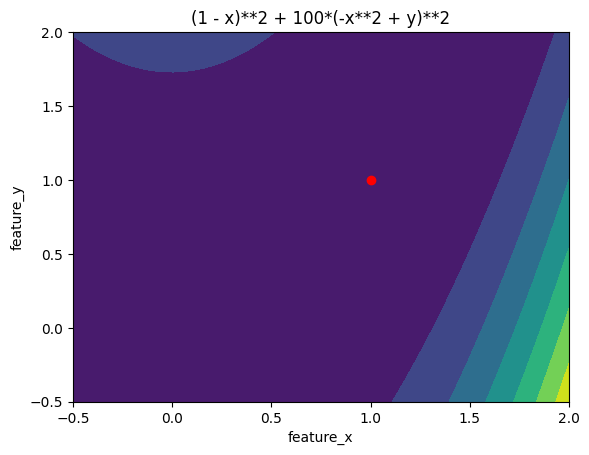

In [109]:
import numpy as np
import sympy as sp
import random
import matplotlib.pyplot as plt

# Create the symbol
x, y = sp.symbols("x y")

# Create the function
f_x_y = (1-x)**2+100*(y-x**2)**2

# Prepare the function for numerical evaluations
grad_f = sp.lambdify((x, y), sp.derive_by_array(f_x_y, (x, y)))  # Use diff instead of derive_by_array

# Gradient Descent parameters
alpha = 0.1  # Step size
iterations = 100  # Number of iterations

# Initial guess for x (starting point)
starting_point = sp.Matrix([1.0, 1.0])
x_descent, y_descent = [], []

# Gradient Descent optimization
for i in range(iterations):
    # Compute the gradient at the current point
    grad = sp.Matrix(grad_f(starting_point[0], starting_point[1]))
    # Update x using the Gradient Descent formula
    starting_point -= alpha * grad
    # Keeping track of the starting points for every iteration
    x_descent.append(starting_point[0])
    y_descent.append(starting_point[0])
    # Checking for convergence
    if grad.norm() < 0.02:
        print(f"Number of iterations taken to converge: {i}")
        # The value of x after optimization represents the minimum of the cost function
        minimum_x_y = starting_point
        # Evaluate f_x at the minimum
        minimum_cost = f_x_y.subs({x:minimum_x_y[0], y:minimum_x_y[1]})
        print(f"Minimum value of x: {minimum_x_y}")
        print(f"Minimum cost: {minimum_cost}")
        break
else:
    print("Failed to converge")
    
# Plotting
feature_x = np.linspace(-0.5, 2.0, 70) 
feature_y = np.linspace(-0.5, 2.0, 70) 
  
# Creating 2-D grid of features 
[X, Y] = np.meshgrid(feature_x, feature_y) 
  
fig, ax = plt.subplots(1, 1) 
  
Z = (1-X)**2+100*(Y-X**2)**2
  
# plots filled contour plot 
ax.contourf(X, Y, Z) 
ax.scatter(x_descent, y_descent, c='r')
  
ax.set_title(f_x_y) 
ax.set_xlabel('feature_x') 
ax.set_ylabel('feature_y') 
  
plt.show() 

# End